# Binary classification

Classification is about predicting an outcome from a fixed list of classes. The prediction is a probability distribution that assigns a probability to each possible outcome.

A labeled classification sample is made up of a bunch of features and a class. The class is a boolean in the case of binary classification. We'll use the phishing dataset as an example.

In [28]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
import collections
from river import datasets

from source.utils.river_utils import evaluate_binary_model

In [30]:
dataset = datasets.Phishing()
dataset

Phishing websites.

This dataset contains features from web pages that are classified as phishing or not.

    Name  Phishing                                                                                                                                              
    Task  Binary classification                                                                                                                                 
 Samples  1,250                                                                                                                                                 
Features  9                                                                                                                                                     
  Sparse  False                                                                                                                                                 
    Path  /home/denys_herasymuk/UCU/Studying_abroad/NYU_Internship/Code/RAI-summer-stabi

Let's take a look at the first sample.

In [31]:
x, y = next(iter(dataset))
x

{'empty_server_form_handler': 0.0,
 'popup_window': 0.0,
 'https': 0.0,
 'request_from_other_domain': 0.0,
 'anchor_from_other_domain': 0.0,
 'is_popular': 0.5,
 'long_url': 1.0,
 'age_of_domain': 1,
 'ip_in_url': 1}

In [32]:
y

True

In [33]:
counts = collections.Counter(y for _, y in dataset)

for c, count in counts.items():
    print(f'{c}: {count} ({count / sum(counts.values()):.5%})')

True: 548 (43.84000%)
False: 702 (56.16000%)


A common way to improve the performance of a logistic regression is to scale the data. This can be done by using a `preprocessing.StandardScaler`. In particular, we can define a pipeline to organise our model into a sequence of steps:

In [34]:
from river import compose
from river import metrics
from river import evaluate
from river import preprocessing
from river import linear_model

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    linear_model.LogisticRegression()
)

model

Pipeline (
  StandardScaler (
    with_std=True
  ),
  LogisticRegression (
    optimizer=SGD (
      lr=Constant (
        learning_rate=0.01
      )
    )
    loss=Log (
      weight_pos=1.
      weight_neg=1.
    )
    l2=0.
    l1=0.
    intercept_init=0.
    intercept_lr=Constant (
      learning_rate=0.01
    )
    clip_gradient=1e+12
    initializer=Zeros ()
  )
)

Index: 50; Accuracy: 78.00%; WeightedF1: 78.03%
Index: 100; Accuracy: 83.00%; WeightedF1: 82.99%
Index: 150; Accuracy: 82.67%; WeightedF1: 82.67%
Index: 200; Accuracy: 83.50%; WeightedF1: 83.50%
Index: 250; Accuracy: 83.60%; WeightedF1: 83.60%
Index: 300; Accuracy: 84.33%; WeightedF1: 84.37%
Index: 350; Accuracy: 85.71%; WeightedF1: 85.76%
Index: 400; Accuracy: 86.00%; WeightedF1: 86.04%
Index: 450; Accuracy: 86.67%; WeightedF1: 86.72%
Index: 500; Accuracy: 86.60%; WeightedF1: 86.63%
Index: 550; Accuracy: 86.91%; WeightedF1: 86.94%
Index: 600; Accuracy: 87.33%; WeightedF1: 87.38%
Index: 650; Accuracy: 87.54%; WeightedF1: 87.60%
Index: 700; Accuracy: 88.14%; WeightedF1: 88.19%
Index: 750; Accuracy: 88.27%; WeightedF1: 88.31%
Index: 800; Accuracy: 88.38%; WeightedF1: 88.41%
Index: 850; Accuracy: 88.47%; WeightedF1: 88.50%
Index: 900; Accuracy: 88.67%; WeightedF1: 88.70%
Index: 950; Accuracy: 88.84%; WeightedF1: 88.87%
Index: 1000; Accuracy: 89.00%; WeightedF1: 89.03%
Index: 1050; Accurac

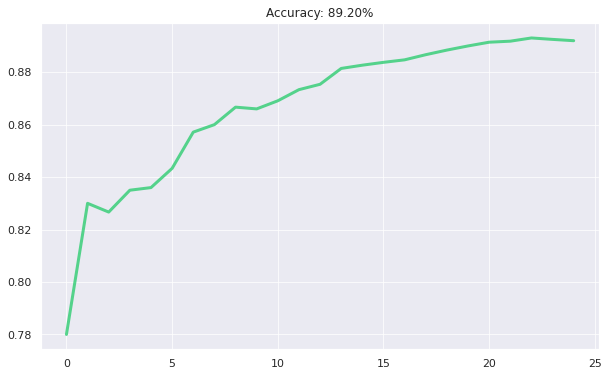

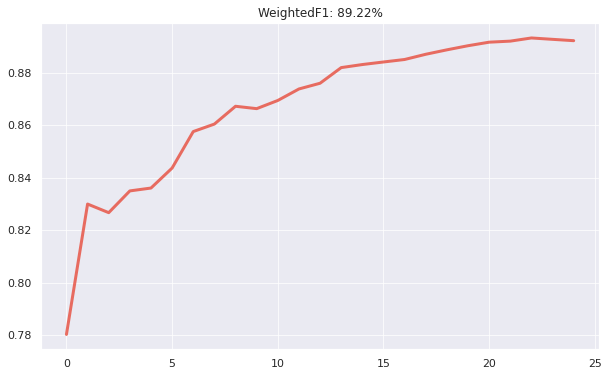

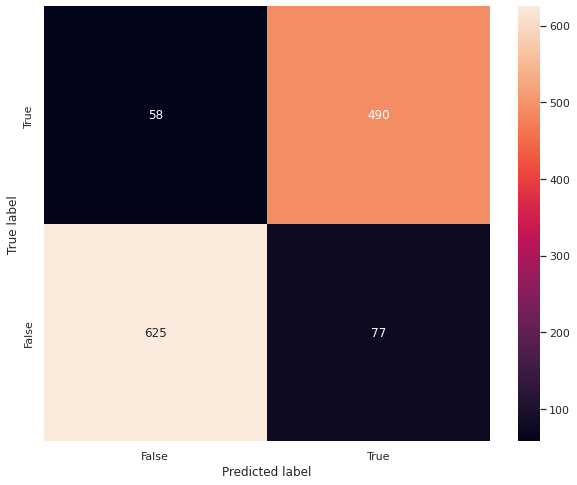

In [35]:
evaluate_binary_model(dataset, model, measure_every=50)